# Data Mining the Water Table

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [51]:
x_train = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/x_train.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/y_train.csv')
x_test = pd.read_csv('https://raw.githubusercontent.com/kayoyin/datasets/master/x_test.csv')

In [3]:
print(x_train.shape, y_train.shape, x_test.shape)

(59400, 40) (59400, 2) (14850, 40)


# Exploratory Data Analysis

In [4]:
x_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
y_train.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
x_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [52]:
y_num = y_train.replace(['functional','non functional', 'functional needs repair'], [0,1,2])

In [44]:
# One hot encoding of training labels
y_train = pd.get_dummies(y_train)
print(y_train.sum())
y_train.head()

id                                      2204638827
status_group_functional                      32259
status_group_functional needs repair          4317
status_group_non functional                  22824
dtype: int64


,id,status_group_functional,status_group_functional needs repair,status_group_non functional
0,69572,1,0,0
1,8776,1,0,0
2,34310,1,0,0
3,67743,0,0,1
4,19728,1,0,0


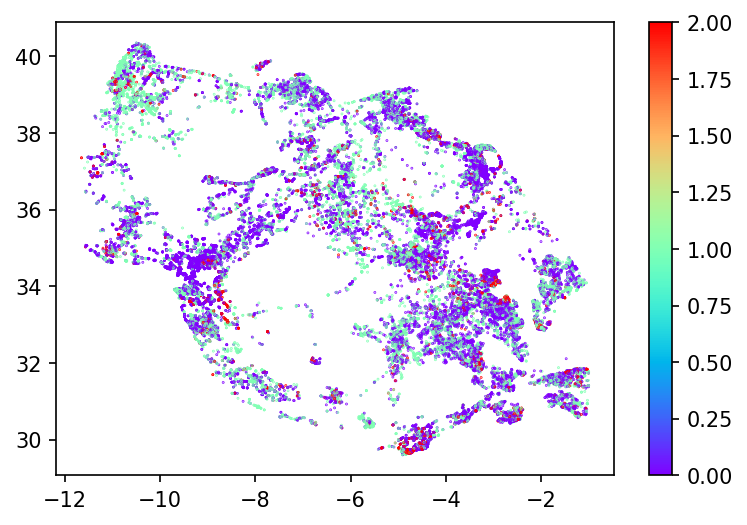

In [56]:
plt.figure(1,dpi=150)
x_geo = x_train.drop(x_train[x_train['longitude'] == 0].index)
y_geo = y_num.drop(x_train[x_train['longitude'] == 0].index)
plt.scatter(x_geo['latitude'], x_geo['longitude'], c = y_geo.iloc[:,1], cmap = 'rainbow', s = 0.1)
plt.colorbar()
plt.show()

In [50]:
y_geo.describe()


,id,status_group_functional,status_group_functional needs repair,status_group_non functional
count,57588.00000,57588.000000,57588.000000,57588.000000
mean,37106.48807,0.545061,0.068261,0.386678
std,21454.51421,0.497970,0.252195,0.486993
min,0.00000,0.000000,0.000000,0.000000
25%,18522.75000,0.000000,0.000000,0.000000
50%,37054.50000,1.000000,0.000000,0.000000
75%,55667.25000,1.000000,0.000000,1.000000
max,74247.00000,1.000000,1.000000,1.000000


# Cleaning up data

## date_recorded

TODO: 
- add 'date_offset' column with number of days since 2013/12/03
- add 'month' column with month recorded

In [22]:
dates = x_train['date_recorded'].map(lambda x: x.replace('-',''))
print(np.max(dates))

20131203
